In [1]:
import json
import pandas as pd

with open("G:/My Drive/GitHub/Experiments-with-CORE/data/cleaned_CORE_corpora.csv") as file:
    dataset_df = pd.read_csv(file)

dataset_df.head()

,label,text,split,GINCORE
0,NA NE,"Ferry consultation needs deeper questions, say...",train,News
1,ID DF,I'v been recording and mixing music for about ...,train,Forum
2,NA SR,The 25-year-old did have chances at Anfield. B...,train,News
3,NA NE,The value of NYC housing construction starts m...,train,News
4,ID DF,"If this is your first visit, be sure to check ...",train,Forum


In [4]:
dataset_df['text_length'] = dataset_df.text.str.split().str.len()

dataset_df.text_length.describe()

count     34848.000000
mean       1254.983672
std        3200.818999
min          52.000000
25%         343.750000
50%         642.000000
75%        1167.000000
max      118278.000000
Name: text_length, dtype: float64

In [2]:
final_dataset = dataset_df[["text","GINCORE"]]
final_dataset.columns = ["text", "labels"]

final_dataset.head()

,text,labels
0,"Ferry consultation needs deeper questions, say...",News
1,I'v been recording and mixing music for about ...,Forum
2,The 25-year-old did have chances at Anfield. B...,News
3,The value of NYC housing construction starts m...,News
4,"If this is your first visit, be sure to check ...",Forum


Create a stratified split. First split the dataset into train and devtest and then split the devtest into dev and test. The final split will be 60:20:20.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(final_dataset, test_size=0.4, random_state=42, shuffle = True, stratify = final_dataset.labels)

In [13]:
train.describe()

,text,labels
count,20908,20908
unique,20908,15
top,Summary of Election Procedures Including Excer...,News
freq,1,7594


In [7]:
devtest.labels.value_counts()

News                       5064
Opinion/Argumentation      3592
Information/Explanation    1363
Forum                      1243
Review                      675
Instruction                 480
Promotion                   410
Research Article            322
Lyrical                     254
Interview                   168
Prose                       110
FAQ                         109
Legal/Regulation             74
Recipe                       67
Script/Drama                  9
Name: labels, dtype: int64

In [10]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

Observe the distribution of the labels in all sets.

In [34]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\TajaK\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:xlabel='value', ylabel='Count'>

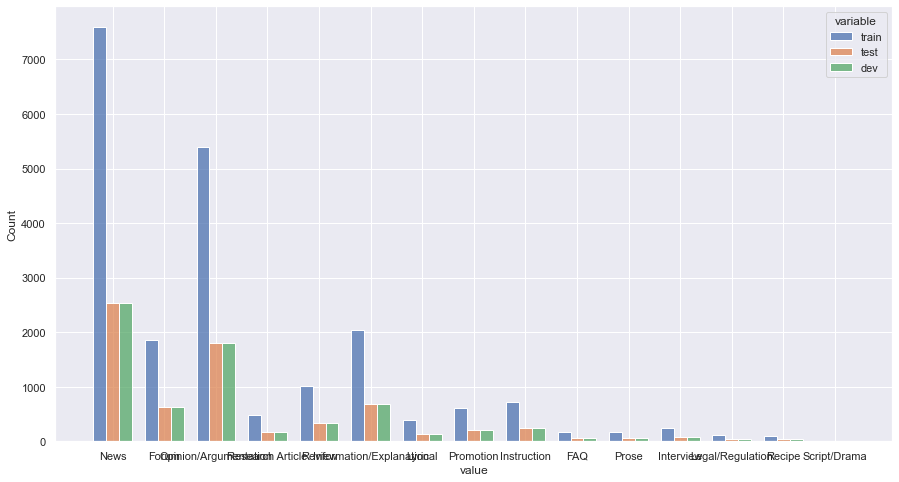

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)


In [39]:
df.describe()

,train,test,dev
count,20908,6970,6970
unique,15,15,15
top,News,News,News
freq,7594,2532,2532


Save the new files as csv

In [41]:
train.to_csv("CORE_train.csv", index=False)
test.to_csv("CORE_test.csv", index=False)
dev.to_csv("CORE_dev.csv", index=False)